# Objective

Fashion-MNIST is a dataset of Zalando's article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

The objective of the project is - to use Fashion-MNIST data set to identify (predict) different fashion products(articles) from the given images using Machine Learning.

# We will be following the below steps to solve this problem:

Importing the libraries

Loading the data

Splitting the data

Visualizing the Data

Building the Model

Fitting the Model

Evaluating the Model Performance

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)

# check the version of keras and tensorflow

In [65]:
print("Tensorflow version",tf.__version__)
print("keras version",keras.__version__)

Tensorflow version 2.6.0
keras version 2.6.0


# Load the data and split into train and test set

In [66]:
mnist_fashion=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist_fashion.load_data()
X_train_full.shape

(60000, 28, 28)

In [67]:
X_valid=X_train_full[:5000]/255
y_valid=y_train_full[ :5000]
X_train=X_train_full[5000:]/255
y_train=y_train_full[5000:]
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)
X_test=X_test/255

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


# Visualizing the Data
#With reference to the class labels and the class names as given in the official documantation of Keras, 
#let us store all them in a list class_names as follows.

Class label is: 4
Class name is: Coat


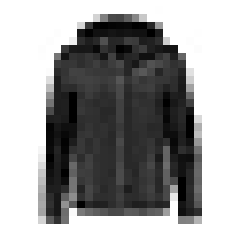

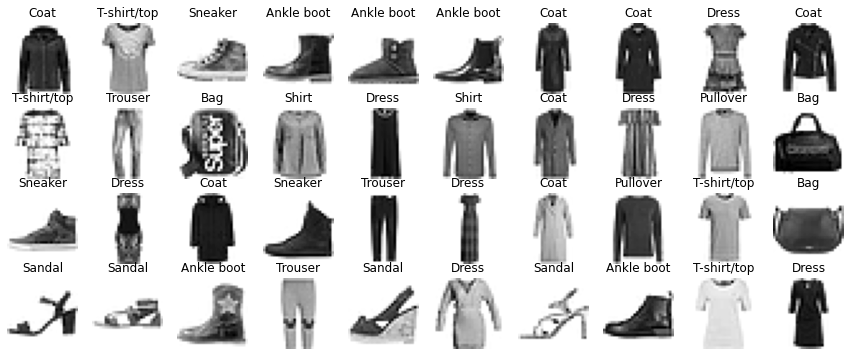

In [68]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

# Building the Model
Let us build a neural network with Dense layers for this classification problem.

Note:

keras.layers.Flatten : Flattens the input.

keras.layers.Dense(300, activation="relu") : Just your regular densely-connected NN layer with 300 neurons and relu 
activation function.

Why do we need clear_session?

It is useful when you're creating multiple models in successions, 
such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in 
the thousands) to the graph. Eventually, models will become slower and slower to train, and you may also run out of memory. 
Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

In [69]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [70]:
sgd=keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])

# Fitting and saving loading and early stopping the Model
model=keras.models.load_model("MNIST_FASHION_MODEL.h5")
Let us train the model on the train data.

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5330 - val_accuracy: 0.7980
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4125 - accuracy: 0.8569 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/100
1719/1719 [==============================] - 2s 959us/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/100
1719/1719 [==============================] - 2s 980us/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3627 - va

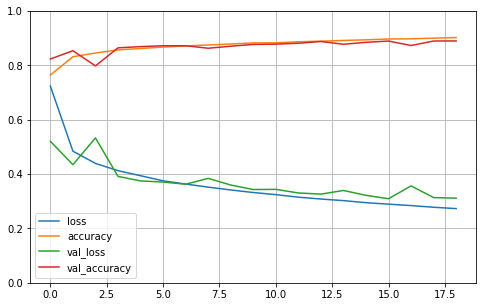

In [71]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("MNIST_FASHION_MODEL.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb,early_stopping_cb])
model.save("MNIST_FASHION_MODEL.h5")
history.params
hidden1 = model.layers[1]
print(hidden1.name)
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

# Evaluating the Model Performance
Let us see how well our model has learnt from the train data, by testing it on the test data.

In [72]:
model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test[:3]),1)
print(y_pred)
print([class_names[index] for index in y_pred])
plt.figure(figsize=(7, 3))

313/313 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8736
[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


<Figure size 504x216 with 0 Axes>

<Figure size 504x216 with 0 Axes>

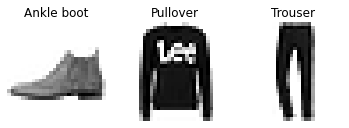

In [73]:
for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()